In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier


pubg_df = pd.DataFrame()
test_df = pd.DataFrame()
train_df=pd.DataFrame()

test_df = pd.read_csv('test_V2.csv')
train_df = pd.read_csv('train_V2.csv')




In [2]:
test_df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints
0,9329eb41e215eb,676b23c24e70d6,45b576ab7daa7f,0,0,51.46,0,0,0,73,...,1500,0,0.0,0,0.0,0,0,588.0,1,0
1,639bd0dcd7bda8,430933124148dd,42a9a0b906c928,0,4,179.10,0,0,2,11,...,1503,2,4669.0,0,0.0,0,0,2017.0,6,0
2,63d5c8ef8dfe91,0b45f5db20ba99,87e7e4477a048e,1,0,23.40,0,0,4,49,...,1565,0,0.0,0,0.0,0,0,787.8,4,0
3,cf5b81422591d1,b7497dbdc77f4a,1b9a94f1af67f1,0,0,65.52,0,0,0,54,...,1465,0,0.0,0,0.0,0,0,1812.0,3,0
4,ee6a295187ba21,6604ce20a1d230,40754a93016066,0,4,330.20,1,2,1,7,...,1480,1,0.0,0,0.0,0,0,2963.0,4,0


In [3]:
train_df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [6]:
feature_col = ['boosts','damageDealt','headshotKills','killPlace','rankPoints','matchDuration','revives','numGroups','winPoints']
X = train_df[feature_col]
y= train_df['winPlacePerc'].apply(ctn_win)

X.head()


,boosts,damageDealt,headshotKills,killPlace,rankPoints,matchDuration,revives,numGroups,winPoints
0,0,0.00,0,60,-1,1306,0,26,1466
1,0,91.47,0,57,1484,1777,0,25,0
2,0,68.00,0,47,1491,1318,0,47,0
3,0,32.90,0,75,1408,1436,0,30,0
4,0,100.00,0,45,1560,1424,0,95,0


In [7]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=10)


In [5]:
def ctn_win(x):
    if x>=1:
        return 1
    else:
        return 0

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


my_RandomForest = RandomForestClassifier(n_estimators = 10, bootstrap = True, random_state=3)

my_RandomForest.fit(X_train,y_train)
randomForest_predict = my_RandomForest.predict(X_test)

accuracy = accuracy_score(y_test,randomForest_predict)
print(accuracy)

0.9703663226682003


In [9]:
y_predict_prob_lr = my_RandomForest.predict_proba(X_test)

print(y_predict_prob_lr)


[[0.9 0.1]
 [1.  0. ]
 [1.  0. ]
 ...
 [1.  0. ]
 [0.9 0.1]
 [1.  0. ]]


In [10]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob_lr[:,1], pos_label=1)

print(fpr)
print(tpr)

AUC = metrics.auc(fpr,tpr)

#print(AUC)

[0.00000000e+00 2.19935790e-05 2.19935790e-05 1.41221929e-04
 1.41800707e-04 1.42958264e-04 1.52797496e-04 1.53376275e-04
 5.40579021e-04 5.41157800e-04 5.42315357e-04 5.42894135e-04
 1.51292673e-03 1.51350550e-03 1.51350550e-03 1.51408428e-03
 1.51582062e-03 1.51582062e-03 1.51755695e-03 1.51755695e-03
 3.66598236e-03 3.66656114e-03 3.67755793e-03 3.67987304e-03
 7.83029291e-03 7.83029291e-03 7.83145047e-03 7.83434436e-03
 7.83608070e-03 7.83608070e-03 1.58973062e-02 1.58978850e-02
 3.08980846e-02 3.08998210e-02 3.09015573e-02 3.09044512e-02
 3.09177631e-02 6.03550111e-02 6.03584838e-02 6.03596413e-02
 6.03607989e-02 6.03619564e-02 6.03625352e-02 6.03636928e-02
 6.03717957e-02 1.28262501e-01 1.28264817e-01 1.28268868e-01
 1.28270604e-01 1.28296071e-01 1.28297228e-01 1.28297807e-01
 1.28298965e-01 1.28300701e-01 1.28302437e-01 1.00000000e+00]
[0.         0.00378357 0.00382278 0.00888061 0.00891982 0.00891982
 0.00946873 0.00946873 0.02236816 0.02236816 0.02236816 0.02236816
 0.04752009

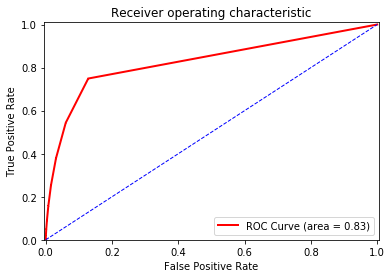

In [11]:
import matplotlib.pyplot as plt
import numpy as np


%matplotlib inline

plt.figure()

plt.plot(fpr,tpr,color='red',lw=2,label='ROC Curve (area = %0.2f)' % AUC)


# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()